## TODO

In [1]:
using OrdinaryDiffEq, ParameterizedFunctions
using Plots, LaTeXStrings

In [2]:
function viral_target!(du, u, pars, t)
    T, I₁, I₂, V = u
    β, k, δ, K, p, c = pars
    du[1] = dT = -β*T*V
    du[2] = dI1 = β*T*V - k*I₁
    du[3] = dI2 = k*I₁ - δ*I₂/(K + I₂)
    du[4] = dV = p*I₂ - c*V
end

viral_target! (generic function with 1 method)

In [3]:
u0 = [1e+7, 75.0, 0.0, 1e-10]
tspan = (0.0, 12.0)
β = 2.4e-4
k = 4.0
δ = 1.6e+6
K = 450000.0
p = 1.6
c = 13.0
pars = [β, k, δ, K, p, c]
prob = ODEProblem(viral_target!, u0, tspan, pars)

ODEProblem with uType Array{Float64,1} and tType Float64. In-place: true
timespan: (0.0, 12.0)
u0: [1.0e7, 75.0, 0.0, 1.0e-10]

In [4]:
sol = solve(prob, Tsit5());

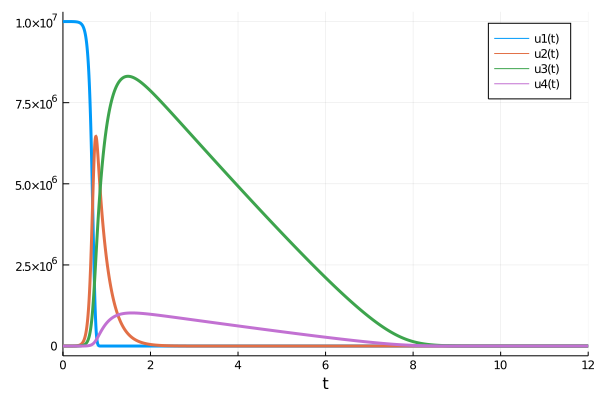

In [5]:
plot(sol, lw=3)

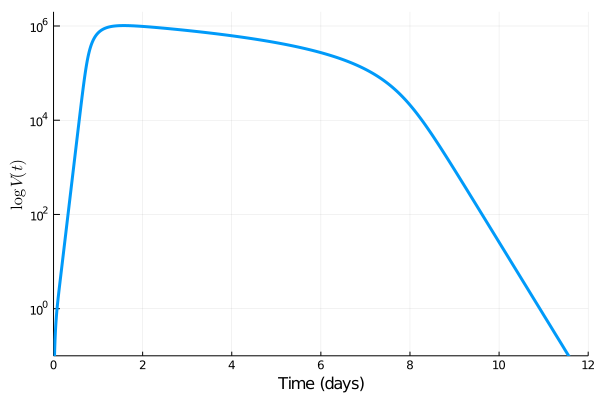

In [6]:
plot(sol, vars=(4), lw=3, legend=:none,
    xaxis = ("Time (days)"),
    yaxis = (L"$\log\, V(t)$", (1e-1, 2e6), :log10))